In [1]:
%cd '/Users/juliencatanese/Dropbox/Datascientest/Projet_datascientest/Data_Kaggle/'
%pwd

/Users/juliencatanese/Dropbox/Datascientest/Projet_datascientest/Data_Kaggle


'/Users/juliencatanese/Dropbox/Datascientest/Projet_datascientest/Data_Kaggle'

### BUILD, RUN AND PLOT A NEURAL NETWORK
use ANN_JCv2_1cell.ipynb

### LOAD and PLOT A NEURAL NETWORK


In [22]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical 

from time import time
from joblib import dump, load

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import classification_report

import itertools
import tensorflow as tf
import shap


# Lecture des donnees PTB.csv
ptb_abnormal = pd.read_csv('./ptbdb_abnormal.csv', header=None)
ptb_normal = pd.read_csv('./ptbdb_normal.csv', header=None)

# Concatenation des deux DataFrames
ptb = pd.concat([ptb_normal, ptb_abnormal], ignore_index=True, sort=False)
ptb.rename(columns={187 :'class'}, inplace=True)

# Lecture des donnees MIT.csv
mit_train = pd.read_csv('./mitbih_train.csv', header=None)
mit_test = pd.read_csv('./mitbih_test.csv', header=None)

# Concatenation des deux DataFrames
mit = pd.concat([mit_train, mit_test], ignore_index=True, sort=False)
mit.rename(columns={187 :'class'}, inplace=True)

# Groupement des classes non-normal (1,2,3,4) en une seule classe Anormal (label=1)
mit['class'].replace({2:1,3:1,4:1}, inplace=True)

# Concatenation des jeux de donnees PTB et MIT  
data = pd.concat([ptb, mit], ignore_index=True, sort=False)

y = data['class'].copy()
X = data.drop('class', axis=1).copy()

X_train90, X_valid, y_train90, y_valid = train_test_split(X, y, train_size=0.9, random_state=1,shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_train90, y_train90, train_size=0.8, random_state=1,shuffle=True)


X_train.shape= (89278, 187)
X_test.shape= (22320, 187)
X_valid.shape= (12400, 187)
y_train.shape= (89278,)
y_train_cat.shape= (89278, 2)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 187)]             0         
                                                                 
 dense_layer1_relu (Dense)   (None, 100)               18800     
                                                                 
 dense_output_softmax (Dense  (None, 2)                202       
 )                                                               
                                                                 
Total params: 19,002
Trainable params: 19,002
Non-trainable params: 0
_________________________________________________________________
None
698/698 [==============================] - 1s 904us/step
              precision    recall  f1-score   support

 

### SHAP for INTERPRETABILITY

In [60]:
LoadFileName = 'ANN_L1_relu100u_.joblib'
model, params, train_history = load(LoadFileName)

X_train.shape= (89278, 187)
X_test.shape= (22320, 187)
X_valid.shape= (12400, 187)
y_train.shape= (89278,)
y_train_cat.shape= (89278, 2)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 187)]             0         
                                                                 
 dense_layer1_relu (Dense)   (None, 100)               18800     
                                                                 
 dense_output_softmax (Dense  (None, 2)                202       
 )                                                               
                                                                 
Total params: 19,002
Trainable params: 19,002
Non-trainable params: 0
_________________________________________________________________
None
698/698 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

   

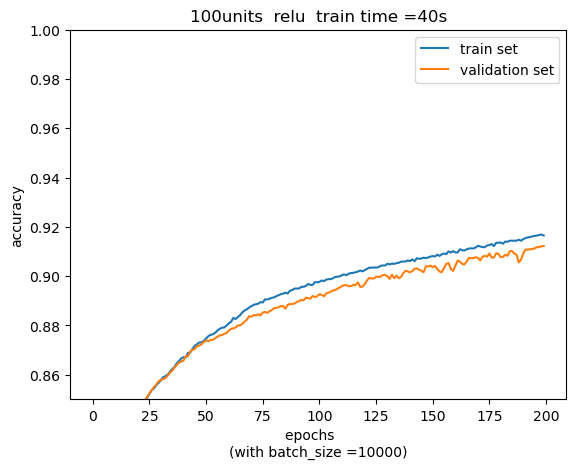

In [61]:
train_set =train_history.history['accuracy']
val_set =train_history.history['val_accuracy']

plt.plot(train_set,label = 'train set');
plt.plot(val_set, label= 'validation set');
plt.ylabel('accuracy')
plt.xlabel('epochs    \n(with batch_size ='+  str(params['batch_size'])  +')')
plt.legend();
plt.ylim([0.85,1])
plt.title( str(params['Layer1']['units']) + 'units  ' + params['Layer1']['activation'] + '  train time =' + str(int(params['train_time'])) +  's')

print('X_train.shape=',X_train.shape)
print('X_test.shape=',X_test.shape)
print('X_valid.shape=',X_valid.shape)

print('y_train.shape=',y_train.shape)
y_train_cat = to_categorical(y_train, dtype='int')
print('y_train_cat.shape=',y_train_cat.shape)


LoadFileName = 'ANN_L1_relu100u_.joblib'
load(LoadFileName)


print(model.summary())
y_pred_cat = model.predict(X_test)
y_pred = y_pred_cat.argmax(axis=1)
print(classification_report(y_test, y_pred))

In [113]:
import shap
# help(shap.DeepExplainer)
import warnings
warnings.filterwarnings('ignore')


nEEG = X_test.to_numpy().shape[0]
print('nEEG_test=',nEEG)
print('nEEG_test/4=',int(nEEG/4))
print('nEEG_test/3=',int(nEEG/3))
print('nEEG_test/2=',int(nEEG/2))



nEEG_test= 22320
nEEG_test/4= 5580
nEEG_test/3= 7440
nEEG_test/2= 11160


In [109]:
nEEG = X_train.to_numpy().shape[0]
print('nEEG=',nEEG)
print('nEEG/4=',int(nEEG/4))
nEEG_to_process = int(nEEG/10)
print('nEEG_to_process=',int(nEEG_to_process))

nEEG= 89278
nEEG/4= 22319
nEEG_to_process= 8927


In [99]:

t0 = time()

explainer = shap.DeepExplainer(
    model, 
    data=X_train.to_numpy()
)
shap_v = explainer.shap_values(X_test.to_numpy()[:nEEG_to_process])

t1 = time() - t0
print("===== Réalisé en {} secondes ======".format(round(t1,3)))

===== Réalisé en 1537.552 secondes ======


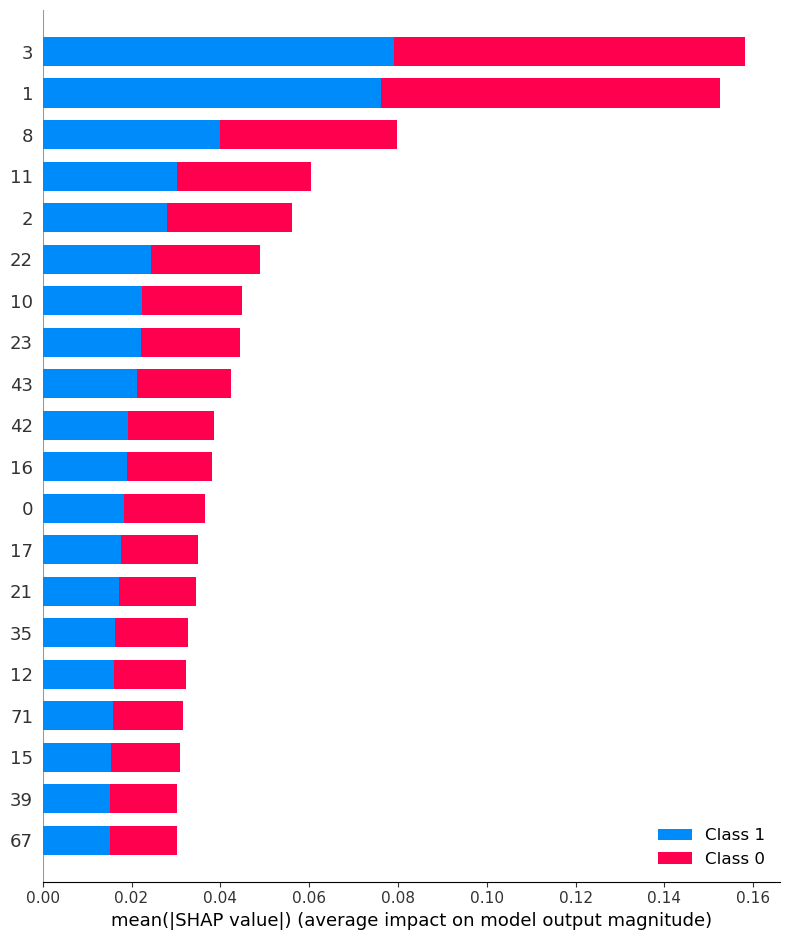

In [101]:
shap.summary_plot(shap_v, X_test, plot_type="bar")

In [87]:
nEEG = X_train.to_numpy().shape[0]
nEEG

89278

In [103]:
1537/60


25.616666666666667

In [104]:
89278*2

178556

In [106]:
178556/60/60

49.59888888888889